In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
post_data = pd.read_csv("/content/drive/MyDrive/portofolio/dataset.csv", delimiter=';')
post_data

,username,full_text
0,euvolliate,@tanyarlfes Chatgpt mah gak papa sebagai alat ...
1,nichimanji,kebut semalam belajar java 💀💀 \n terimakasih t...
2,50suto,@Vizident69 Kode curang ChatGPT.
3,Arinanooo,"Kekuatan sistem kebut semalam, g~translate dan..."
4,itsmeisal,Chatgpt bisa jawab pertanyaanku yang berbau il...
...,...,...
2926,827core,@berrylattejpg bisa pake chat gpt cuman ya git...
2927,jeenthusias,"minimal kalo gatau tuh googling, atau yang leb..."
2928,Ldi_32,training data google pasti lebih banyak :3 \n ...
2929,codingfess,code; cara junior dev buat ngerti system desig...


In [4]:
#cleaning
#pembersihan teks dari tab, new line, link, hastag, URL, back slice
import string
import re #regex library

def remove_ulasan_special(text):
  text = text.replace('\\t'," ").replace('\\n', " ").replace('\\u'," ").replace('\\'," ")
  text = text.encode('ascii','replace').decode('ascii')
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  return text.replace("http://", " ").replace("https://", " ")
post_data['full_text'] = post_data['full_text'].apply(remove_ulasan_special)

#remove number
def remove_number(text):
  return re.sub(r"{\d+}", " ", text)
post_data['full_text'] = post_data['full_text'].apply(remove_number)

#remove punktuation
def remove_punctuation(text):
  return text.translate(str.maketrans("","",string.punctuation))
post_data['full_text'] = post_data['full_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitesplace_LT(text):
  return text.strip()
post_data['full_text'] = post_data['full_text'].apply(remove_whitesplace_LT)

#remove multiple whitespace into single whitespace
def remove_whitesplace_multiple(text):
  return re.sub('\s+',' ',text)
post_data['full_text'] = post_data['full_text'].apply(remove_whitesplace_multiple)

#remove single char
def remove_single_char(text):
  return re.sub(r"\b[a-zA-Z]\b","",text)
post_data['cleaning'] = post_data['full_text'].apply(remove_single_char)

# remove duplicate data
post_data.drop_duplicates(subset="full_text", keep='first', inplace = True)
post_data

,username,full_text,cleaning
0,euvolliate,Chatgpt mah gak papa sebagai alat bantu cari s...,Chatgpt mah gak papa sebagai alat bantu cari s...
1,nichimanji,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...
2,50suto,Kode curang ChatGPT,Kode curang ChatGPT
3,Arinanooo,Kekuatan sistem kebut semalam gtranslate dan s...,Kekuatan sistem kebut semalam gtranslate dan s...
4,itsmeisal,Chatgpt bisa jawab pertanyaanku yang berbau il...,Chatgpt bisa jawab pertanyaanku yang berbau il...
...,...,...,...
2926,827core,bisa pake chat gpt cuman ya gituuu full englis...,bisa pake chat gpt cuman ya gituuu full englis...
2927,jeenthusias,minimal kalo gatau tuh googling atau yang lebi...,minimal kalo gatau tuh googling atau yang lebi...
2928,Ldi_32,training data google pasti lebih banyak 3 dan ...,training data google pasti lebih banyak 3 dan ...
2929,codingfess,code cara junior dev buat ngerti system design...,code cara junior dev buat ngerti system design...


In [5]:
#case folding
post_data['case_folding'] = post_data['cleaning'].str.lower()
post_data

,username,full_text,cleaning,case_folding
0,euvolliate,Chatgpt mah gak papa sebagai alat bantu cari s...,Chatgpt mah gak papa sebagai alat bantu cari s...,chatgpt mah gak papa sebagai alat bantu cari s...
1,nichimanji,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...
2,50suto,Kode curang ChatGPT,Kode curang ChatGPT,kode curang chatgpt
3,Arinanooo,Kekuatan sistem kebut semalam gtranslate dan s...,Kekuatan sistem kebut semalam gtranslate dan s...,kekuatan sistem kebut semalam gtranslate dan s...
4,itsmeisal,Chatgpt bisa jawab pertanyaanku yang berbau il...,Chatgpt bisa jawab pertanyaanku yang berbau il...,chatgpt bisa jawab pertanyaanku yang berbau il...
...,...,...,...,...
2926,827core,bisa pake chat gpt cuman ya gituuu full englis...,bisa pake chat gpt cuman ya gituuu full englis...,bisa pake chat gpt cuman ya gituuu full englis...
2927,jeenthusias,minimal kalo gatau tuh googling atau yang lebi...,minimal kalo gatau tuh googling atau yang lebi...,minimal kalo gatau tuh googling atau yang lebi...
2928,Ldi_32,training data google pasti lebih banyak 3 dan ...,training data google pasti lebih banyak 3 dan ...,training data google pasti lebih banyak 3 dan ...
2929,codingfess,code cara junior dev buat ngerti system design...,code cara junior dev buat ngerti system design...,code cara junior dev buat ngerti system design...


In [6]:
#tokenizing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def word_tokenize_wrapper(text):
  return word_tokenize(text)
post_data['tokenizing'] = post_data['case_folding'].apply(word_tokenize_wrapper)
post_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,username,full_text,cleaning,case_folding,tokenizing
0,euvolliate,Chatgpt mah gak papa sebagai alat bantu cari s...,Chatgpt mah gak papa sebagai alat bantu cari s...,chatgpt mah gak papa sebagai alat bantu cari s...,"[chatgpt, mah, gak, papa, sebagai, alat, bantu..."
1,nichimanji,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,"[kebut, semalam, belajar, java, terimakasih, t..."
2,50suto,Kode curang ChatGPT,Kode curang ChatGPT,kode curang chatgpt,"[kode, curang, chatgpt]"
3,Arinanooo,Kekuatan sistem kebut semalam gtranslate dan s...,Kekuatan sistem kebut semalam gtranslate dan s...,kekuatan sistem kebut semalam gtranslate dan s...,"[kekuatan, sistem, kebut, semalam, gtranslate,..."
4,itsmeisal,Chatgpt bisa jawab pertanyaanku yang berbau il...,Chatgpt bisa jawab pertanyaanku yang berbau il...,chatgpt bisa jawab pertanyaanku yang berbau il...,"[chatgpt, bisa, jawab, pertanyaanku, yang, ber..."


In [10]:
#normalization
normalizad_word = pd.read_csv("/content/drive/MyDrive/portofolio/colloquial-indonesian-lexicon.csv")
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
  if row[0] not in normalizad_word_dict:
    normalizad_word_dict[row[0]] = row[1]
def normalized_term(document):
  return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]
post_data['normalization'] = post_data['tokenizing'].apply(normalized_term)
post_data.head()

,username,full_text,cleaning,case_folding,tokenizing,normalization
0,euvolliate,Chatgpt mah gak papa sebagai alat bantu cari s...,Chatgpt mah gak papa sebagai alat bantu cari s...,chatgpt mah gak papa sebagai alat bantu cari s...,"[chatgpt, mah, gak, papa, sebagai, alat, bantu...","[chatgpt, mah, enggak, papa, sebagai, alat, ba..."
1,nichimanji,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,"[kebut, semalam, belajar, java, terimakasih, t...","[kebut, semalam, belajar, java, terimakasih, t..."
2,50suto,Kode curang ChatGPT,Kode curang ChatGPT,kode curang chatgpt,"[kode, curang, chatgpt]","[kode, curang, chatgpt]"
3,Arinanooo,Kekuatan sistem kebut semalam gtranslate dan s...,Kekuatan sistem kebut semalam gtranslate dan s...,kekuatan sistem kebut semalam gtranslate dan s...,"[kekuatan, sistem, kebut, semalam, gtranslate,...","[kekuatan, sistem, kebut, semalam, gtranslate,..."
4,itsmeisal,Chatgpt bisa jawab pertanyaanku yang berbau il...,Chatgpt bisa jawab pertanyaanku yang berbau il...,chatgpt bisa jawab pertanyaanku yang berbau il...,"[chatgpt, bisa, jawab, pertanyaanku, yang, ber...","[chatgpt, bisa, jawab, pertanyaanku, yang, ber..."


In [11]:
#stopword removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
# list_stopwords.extend(['pas', 'ya', 'sih', 'deh', 'loh', 'oiya', 'nih', 'ok', 'ah', 'nya','sm','kalo','yg','dg','dgn','dg','rt',
                      #  'ny','d','klo','kalo','mah','amp','biar','bikin','bilang','krn','nya','nih','sih','si','tau','papa','tdk','tuh','utk',
                      #  'ya','jd','jgn','sdh','aja','n','t','nyg','hehe','pen','blg','u','nan','loh', '&amp', 'yah'])

def stopwords_removal(words):
  return [word for word in words if word not in list_stopwords ]
post_data['stopword_removal'] = post_data['normalization'].apply(stopwords_removal)
post_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,username,full_text,cleaning,case_folding,tokenizing,normalization,stopword_removal
0,euvolliate,Chatgpt mah gak papa sebagai alat bantu cari s...,Chatgpt mah gak papa sebagai alat bantu cari s...,chatgpt mah gak papa sebagai alat bantu cari s...,"[chatgpt, mah, gak, papa, sebagai, alat, bantu...","[chatgpt, mah, enggak, papa, sebagai, alat, ba...","[chatgpt, mah, papa, alat, bantu, cari, sumber..."
1,nichimanji,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,"[kebut, semalam, belajar, java, terimakasih, t...","[kebut, semalam, belajar, java, terimakasih, t...","[kebut, semalam, belajar, java, terimakasih, t..."
2,50suto,Kode curang ChatGPT,Kode curang ChatGPT,kode curang chatgpt,"[kode, curang, chatgpt]","[kode, curang, chatgpt]","[kode, curang, chatgpt]"
3,Arinanooo,Kekuatan sistem kebut semalam gtranslate dan s...,Kekuatan sistem kebut semalam gtranslate dan s...,kekuatan sistem kebut semalam gtranslate dan s...,"[kekuatan, sistem, kebut, semalam, gtranslate,...","[kekuatan, sistem, kebut, semalam, gtranslate,...","[kekuatan, sistem, kebut, semalam, gtranslate,..."
4,itsmeisal,Chatgpt bisa jawab pertanyaanku yang berbau il...,Chatgpt bisa jawab pertanyaanku yang berbau il...,chatgpt bisa jawab pertanyaanku yang berbau il...,"[chatgpt, bisa, jawab, pertanyaanku, yang, ber...","[chatgpt, bisa, jawab, pertanyaanku, yang, ber...","[chatgpt, pertanyaanku, berbau, ilmiah, bongka..."


In [12]:
!pip3 install swifter
!pip3 install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=105f7f122f61b13cdc4a98e6fcec6ff9c8c97227f91533e12d957310371eecf0
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.5 MB/s eta 0:00:00


In [13]:
#import sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

#create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed
def stemmed_wrapper(term):
  stemmed_term = stemmer.stem(term)
  return stemmed_term

def get_stemmed_term(document):
  return [stemmed_wrapper(term) for term in document]


# apply stemmed to data frame
post_data['stemming'] = post_data['stopword_removal'].swifter.apply(get_stemmed_term)
post_data.head()

Pandas Apply:   0%|          | 0/2885 [00:00<?, ?it/s]

,username,full_text,cleaning,case_folding,tokenizing,normalization,stopword_removal,stemming
0,euvolliate,Chatgpt mah gak papa sebagai alat bantu cari s...,Chatgpt mah gak papa sebagai alat bantu cari s...,chatgpt mah gak papa sebagai alat bantu cari s...,"[chatgpt, mah, gak, papa, sebagai, alat, bantu...","[chatgpt, mah, enggak, papa, sebagai, alat, ba...","[chatgpt, mah, papa, alat, bantu, cari, sumber...","[chatgpt, mah, papa, alat, bantu, cari, sumber..."
1,nichimanji,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,"[kebut, semalam, belajar, java, terimakasih, t...","[kebut, semalam, belajar, java, terimakasih, t...","[kebut, semalam, belajar, java, terimakasih, t...","[kebut, malam, ajar, java, terimakasih, tutori..."
2,50suto,Kode curang ChatGPT,Kode curang ChatGPT,kode curang chatgpt,"[kode, curang, chatgpt]","[kode, curang, chatgpt]","[kode, curang, chatgpt]","[kode, curang, chatgpt]"
3,Arinanooo,Kekuatan sistem kebut semalam gtranslate dan s...,Kekuatan sistem kebut semalam gtranslate dan s...,kekuatan sistem kebut semalam gtranslate dan s...,"[kekuatan, sistem, kebut, semalam, gtranslate,...","[kekuatan, sistem, kebut, semalam, gtranslate,...","[kekuatan, sistem, kebut, semalam, gtranslate,...","[kuat, sistem, kebut, malam, gtranslate, chat,..."
4,itsmeisal,Chatgpt bisa jawab pertanyaanku yang berbau il...,Chatgpt bisa jawab pertanyaanku yang berbau il...,chatgpt bisa jawab pertanyaanku yang berbau il...,"[chatgpt, bisa, jawab, pertanyaanku, yang, ber...","[chatgpt, bisa, jawab, pertanyaanku, yang, ber...","[chatgpt, pertanyaanku, berbau, ilmiah, bongka...","[chatgpt, tanya, bau, ilmiah, bongkarbongkar, ..."


In [14]:
# convert token to text list
import ast
def join_text_list(texts):
 return ' '.join([text for text in texts])
post_data['posts'] = post_data['stemming'].apply(join_text_list)
post_data.head()

,username,full_text,cleaning,case_folding,tokenizing,normalization,stopword_removal,stemming,posts
0,euvolliate,Chatgpt mah gak papa sebagai alat bantu cari s...,Chatgpt mah gak papa sebagai alat bantu cari s...,chatgpt mah gak papa sebagai alat bantu cari s...,"[chatgpt, mah, gak, papa, sebagai, alat, bantu...","[chatgpt, mah, enggak, papa, sebagai, alat, ba...","[chatgpt, mah, papa, alat, bantu, cari, sumber...","[chatgpt, mah, papa, alat, bantu, cari, sumber...",chatgpt mah papa alat bantu cari sumber check ...
1,nichimanji,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,kebut semalam belajar java terimakasih tutoria...,"[kebut, semalam, belajar, java, terimakasih, t...","[kebut, semalam, belajar, java, terimakasih, t...","[kebut, semalam, belajar, java, terimakasih, t...","[kebut, malam, ajar, java, terimakasih, tutori...",kebut malam ajar java terimakasih tutorial yut...
2,50suto,Kode curang ChatGPT,Kode curang ChatGPT,kode curang chatgpt,"[kode, curang, chatgpt]","[kode, curang, chatgpt]","[kode, curang, chatgpt]","[kode, curang, chatgpt]",kode curang chatgpt
3,Arinanooo,Kekuatan sistem kebut semalam gtranslate dan s...,Kekuatan sistem kebut semalam gtranslate dan s...,kekuatan sistem kebut semalam gtranslate dan s...,"[kekuatan, sistem, kebut, semalam, gtranslate,...","[kekuatan, sistem, kebut, semalam, gtranslate,...","[kekuatan, sistem, kebut, semalam, gtranslate,...","[kuat, sistem, kebut, malam, gtranslate, chat,...",kuat sistem kebut malam gtranslate chat gpt
4,itsmeisal,Chatgpt bisa jawab pertanyaanku yang berbau il...,Chatgpt bisa jawab pertanyaanku yang berbau il...,chatgpt bisa jawab pertanyaanku yang berbau il...,"[chatgpt, bisa, jawab, pertanyaanku, yang, ber...","[chatgpt, bisa, jawab, pertanyaanku, yang, ber...","[chatgpt, pertanyaanku, berbau, ilmiah, bongka...","[chatgpt, tanya, bau, ilmiah, bongkarbongkar, ...",chatgpt tanya bau ilmiah bongkarbongkar jurnal ya


In [17]:
post_data.to_csv("Data_Preprocessing.csv")

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [21]:
post_data = pd.read_csv("Data_Preprocessing.csv", usecols=["posts"])
post_data.head()

,posts
0,chatgpt mah papa alat bantu cari sumber check ...
1,kebut malam ajar java terimakasih tutorial yut...
2,kode curang chatgpt
3,kuat sistem kebut malam gtranslate chat gpt
4,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya


In [22]:
# translate text ke english
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import *
translator = googletrans.Translator()

post_data['post'] = post_data['posts'].astype(str)
post_data['Text'] = post_data['posts'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
post_data

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=31d5d0750e1568291f8b85f6f3e138806d7e9b193497c6bdc6e165b85963d0c3
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

,posts,post,Text
0,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa tool to help find sources che...
1,kebut malam ajar java terimakasih tutorial yut...,kebut malam ajar java terimakasih tutorial yut...,"night racing, teach Java, thank you for the Yo..."
2,kode curang chatgpt,kode curang chatgpt,chatgpt cheat codes
3,kuat sistem kebut malam gtranslate chat gpt,kuat sistem kebut malam gtranslate chat gpt,powerful gtranslate chat gpt night speed system
4,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt asked about the scientific smell of di...
...,...,...,...
2880,pakai chat gpt cuman ya full english gue tulis...,pakai chat gpt cuman ya full english gue tulis...,"I only use GPT chat, it's full English, I writ..."
2881,minimal kalo enggak tau tuh googling gampang c...,minimal kalo enggak tau tuh googling gampang c...,"At least, if you don't know, it's easy to goog..."
2882,training data google 3 tarik bard langsung con...,training data google 3 tarik bard langsung con...,training data google 3 pull bard directly conn...
2883,code junior dev erti system design kayak ya se...,code junior dev erti system design kayak ya se...,code junior dev erti system design kayak ya se...


In [23]:
post_data = post_data.dropna()
post_data.head()

,posts,post,Text
0,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa tool to help find sources che...
1,kebut malam ajar java terimakasih tutorial yut...,kebut malam ajar java terimakasih tutorial yut...,"night racing, teach Java, thank you for the Yo..."
2,kode curang chatgpt,kode curang chatgpt,chatgpt cheat codes
3,kuat sistem kebut malam gtranslate chat gpt,kuat sistem kebut malam gtranslate chat gpt,powerful gtranslate chat gpt night speed system
4,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt asked about the scientific smell of di...


In [24]:
sentiments = SentimentIntensityAnalyzer()
post_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in post_data["Text"]]
post_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in post_data["Text"]]
post_data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in post_data["Text"]]
post_data["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in post_data["Text"]]
post_data.head()

<ipython-input-24-c9207236eac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in post_data["Text"]]
<ipython-input-24-c9207236eac9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in post_data["Text"]]
<ipython-input-24-c9207236eac9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,posts,post,Text,Positive,Negative,Neutral,Compound
0,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa tool to help find sources che...,0.162,0.0,0.838,0.4019
1,kebut malam ajar java terimakasih tutorial yut...,kebut malam ajar java terimakasih tutorial yut...,"night racing, teach Java, thank you for the Yo...",0.200,0.0,0.800,0.3612
2,kode curang chatgpt,kode curang chatgpt,chatgpt cheat codes,0.000,0.6,0.400,-0.4588
3,kuat sistem kebut malam gtranslate chat gpt,kuat sistem kebut malam gtranslate chat gpt,powerful gtranslate chat gpt night speed system,0.318,0.0,0.682,0.4215
4,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt asked about the scientific smell of di...,0.000,0.0,1.000,0.0000


In [25]:
score = post_data["Compound"].values
sentiment = []
for i in score:
  if i > 0.00:
    sentiment.append('positif')
  elif i < 0.00:
    sentiment.append('negatif')
  else:
    sentiment.append('netral')
post_data["Sentiment"] = sentiment
post_data

<ipython-input-25-d031d5261a87>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data["Sentiment"] = sentiment


,posts,post,Text,Positive,Negative,Neutral,Compound,Sentiment
0,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa tool to help find sources che...,0.162,0.000,0.838,0.4019,positif
1,kebut malam ajar java terimakasih tutorial yut...,kebut malam ajar java terimakasih tutorial yut...,"night racing, teach Java, thank you for the Yo...",0.200,0.000,0.800,0.3612,positif
2,kode curang chatgpt,kode curang chatgpt,chatgpt cheat codes,0.000,0.600,0.400,-0.4588,negatif
3,kuat sistem kebut malam gtranslate chat gpt,kuat sistem kebut malam gtranslate chat gpt,powerful gtranslate chat gpt night speed system,0.318,0.000,0.682,0.4215,positif
4,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt asked about the scientific smell of di...,0.000,0.000,1.000,0.0000,netral
...,...,...,...,...,...,...,...,...
2880,pakai chat gpt cuman ya full english gue tulis...,pakai chat gpt cuman ya full english gue tulis...,"I only use GPT chat, it's full English, I writ...",0.000,0.000,1.000,0.0000,netral
2881,minimal kalo enggak tau tuh googling gampang c...,minimal kalo enggak tau tuh googling gampang c...,"At least, if you don't know, it's easy to goog...",0.000,0.194,0.806,-0.3412,negatif
2882,training data google 3 tarik bard langsung con...,training data google 3 tarik bard langsung con...,training data google 3 pull bard directly conn...,0.000,0.000,1.000,0.0000,netral
2883,code junior dev erti system design kayak ya se...,code junior dev erti system design kayak ya se...,code junior dev erti system design kayak ya se...,0.000,0.000,1.000,0.0000,netral


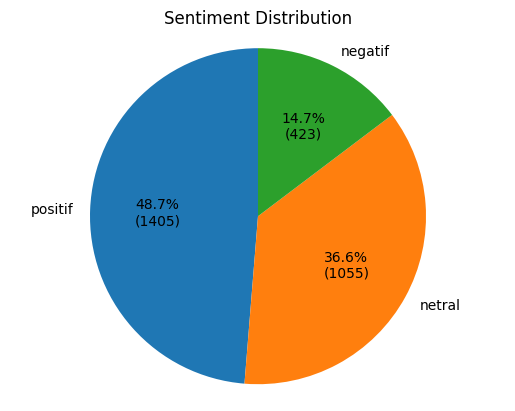

In [26]:
import matplotlib.pyplot as plt

# Count the occurrence of each sentiment label
sentiment_counts = post_data["Sentiment"].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*len(post_data))})",
        startangle=90)

# Add a title
plt.title("Sentiment Distribution")

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [27]:
post_data.to_csv("lexicon_based.csv")

In [28]:
dataset = pd.read_csv("lexicon_based.csv")
dataset.head()

,Unnamed: 0,posts,post,Text,Positive,Negative,Neutral,Compound,Sentiment
0,0,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa alat bantu cari sumber check ...,chatgpt mah papa tool to help find sources che...,0.162,0.0,0.838,0.4019,positif
1,1,kebut malam ajar java terimakasih tutorial yut...,kebut malam ajar java terimakasih tutorial yut...,"night racing, teach Java, thank you for the Yo...",0.200,0.0,0.800,0.3612,positif
2,2,kode curang chatgpt,kode curang chatgpt,chatgpt cheat codes,0.000,0.6,0.400,-0.4588,negatif
3,3,kuat sistem kebut malam gtranslate chat gpt,kuat sistem kebut malam gtranslate chat gpt,powerful gtranslate chat gpt night speed system,0.318,0.0,0.682,0.4215,positif
4,4,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,chatgpt asked about the scientific smell of di...,0.000,0.0,1.000,0.0000,netral


In [29]:
del dataset['Unnamed: 0']

In [39]:
del dataset['post']
del dataset['Text']

In [42]:
dataset

,posts,Positive,Negative,Neutral,Compound,Sentiment
0,chatgpt mah papa alat bantu cari sumber check ...,0.162,0.000,0.838,0.4019,positif
1,kebut malam ajar java terimakasih tutorial yut...,0.200,0.000,0.800,0.3612,positif
2,kode curang chatgpt,0.000,0.600,0.400,-0.4588,negatif
3,kuat sistem kebut malam gtranslate chat gpt,0.318,0.000,0.682,0.4215,positif
4,chatgpt tanya bau ilmiah bongkarbongkar jurnal ya,0.000,0.000,1.000,0.0000,netral
...,...,...,...,...,...,...
2879,pakai chat gpt cuman ya full english gue tulis...,0.000,0.000,1.000,0.0000,netral
2880,minimal kalo enggak tau tuh googling gampang c...,0.000,0.194,0.806,-0.3412,negatif
2881,training data google 3 tarik bard langsung con...,0.000,0.000,1.000,0.0000,netral
2882,code junior dev erti system design kayak ya se...,0.000,0.000,1.000,0.0000,netral


In [43]:
dataset.Sentiment.unique()

array(['positif', 'negatif', 'netral'], dtype=object)

In [44]:
x = dataset.iloc[:, 1:5].values
y = dataset.iloc[:, 5].values

In [45]:
from pandas.core.generic import Axis
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x)
x_filled = imputer.transform(x)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_filled, y, test_size=0.1, random_state=9)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [50]:
y_pred = classifier.predict(x_test)

In [51]:
y_test

array(['negatif', 'negatif', 'netral', 'positif', 'positif', 'negatif',
       'netral', 'positif', 'positif', 'positif', 'positif', 'negatif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'netral',
       'positif', 'positif', 'negatif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'netral', 'netral', 'positif', 'netral',
       'netral', 'positif', 'netral', 'positif', 'netral', 'netral',
       'netral', 'negatif', 'netral', 'positif', 'netral', 'negatif',
       'netral', 'negatif', 'netral', 'negatif', 'netral', 'positif',
       'positif', 'positif', 'netral', 'positif', 'negatif', 'positif',
       'netral', 'netral', 'netral', 'netral', 'positif', 'positif',
       'positif', 'negatif', 'netral', 'netral', 'netral', 'netral',
       'positif', 'positif', 'netral', 'netral', 'positif', 'netral',
       'netral', 'negatif', 'positif', 'negatif', 'netral', 'netral',
       'netral', 'negatif', 'positif', 'netral', 'netral', 'positif',
       'nega

In [52]:
y_test = pd.DataFrame({'naivebayes': y_test})
dataset['naivebayes'] = y_test
dataset.tail()

,posts,Positive,Negative,Neutral,Compound,Sentiment,naivebayes
2879,pakai chat gpt cuman ya full english gue tulis...,0.000,0.000,1.000,0.0000,netral,NaN
2880,minimal kalo enggak tau tuh googling gampang c...,0.000,0.194,0.806,-0.3412,negatif,NaN
2881,training data google 3 tarik bard langsung con...,0.000,0.000,1.000,0.0000,netral,NaN
2882,code junior dev erti system design kayak ya se...,0.000,0.000,1.000,0.0000,netral,NaN
2883,wkwk chatgpt sepinter bgg,0.719,0.000,0.281,0.8256,positif,NaN


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [54]:
print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix :")
print(cm)

Akurasi : 98.96193771626297%
Confussion Matrix :
[[ 43   0   0]
 [  0 112   0]
 [  3   0 131]]


In [55]:
from sklearn import metrics
print("classification report")
print(metrics.classification_report(y_test, y_pred))

classification report
              precision    recall  f1-score   support

     negatif       0.93      1.00      0.97        43
      netral       1.00      1.00      1.00       112
     positif       1.00      0.98      0.99       134

    accuracy                           0.99       289
   macro avg       0.98      0.99      0.98       289
weighted avg       0.99      0.99      0.99       289



In [56]:
!pip install matplotlib seaborn

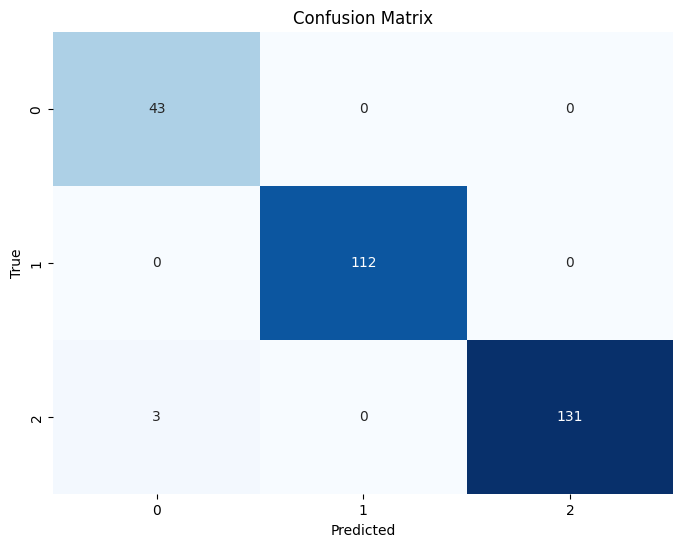

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Assuming y_test and y_pred are defined correctly
cm = metrics.confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()